## 외판원 문제 해결 
- Traveling Salesman Problom 
- NP-난해 문제 
- 입력 : n개의 도시로 된 리스트와 도시 간 거리
- 출력 : 모든 도시를 한 번씩 방문하고 출발지로 되돌아오는 가장 짧은 투어 

### 무차별 대입 전략 
- 동작 원리 
1. 가능한 모든 투어 일정을 생성하고 이동 거리를 측정
2. 이동 거리가 가장 짧은 투어 선택 

In [1]:
import random 
from itertools import permutations
alltours = permutations 

# 두 지점 간의 거리 계산 
def distance_points(first, second):
    return abs(first - second)

# 외판원이 이동해야 할 투어의 이동 거리 계산 
def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) for i in range(len(aTour)))

# 복소수로 표현 
aCity = complex 

# 가로 500, 세로 300의 직사각형 안에서 n개의 도시를 무작위로 생성
def generate_cities(number_of_cities):
    seed = 111
    width = 500
    height = 300
    random.seed((number_of_cities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1, height)) \
                    for c in range(number_of_cities))

# 모든 가능한 투어를 생성한 다음 그 중에서 이동 거리가 가장 짧은 투어를 선택 
def brute_force(cities):
    return shortest_tour(alltours(cities))

def shortest_tour(tours):
    return min(tours, key = distance_tour)

In [2]:
# 도시 시각화 함수 구현 
import matplotlib.pyplot as plt 

def X(city): "X axis"; return city.real 
def Y(city): "Y axis"; return city.imag 

# 도시와 연결선을 그리는 함수
def visualize_segment(segment, style = 'bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on = False)
    plt.axis('scaled')
    plt.axis('off')

# 모든 도시와 도시 간 연결선을 그리고 투어를 시작한 도시에 별도의 표시
def visualize_tour(tour, style = 'bo-'):
    if len(tour) > 1000 :
        plt.figure(figsize = (15, 10))
    
    start = tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD')

In [3]:
import time 
from collections import Counter 

# tsp 함수 
# 1. 입력된 도시 개수에 따라 투어를 생성
# 2. 알고리즘이 실행되는 시간을 측정 
# 3. 그래프를 생성 
def tsp(algorithm, cities):
    t0 = time.perf_counter()
    tour = algorithm(cities)
    t1 = time.perf_counter()
    # 모든 도시는 한번만 등장해야함 
    assert Counter(tour) == Counter(cities)
    visualize_tour(tour) 
    print("{}:{} cities = tour length {:.0f} (in {:.3f} sec)".format(name(algorithm), len(tour), \
        distance_tour(tour), t1 - t0))

def name(algorithm):
    return algorithm.__name__.replace('_tsp', '')

brute_force:10 cities = tour length 1218 (in 23.437 sec)


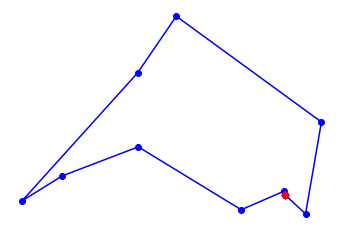

In [4]:
tsp(brute_force, generate_cities(10))